# Importing & Inspecting

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt

# preprocessing
from sklearn.decomposition import PCA
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE, ADASYN

# selection and tunning
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict, KFold, train_test_split, GridSearchCV, learning_curve
from sklearn.pipeline import make_pipeline, Pipeline

# models
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier

# evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")


data_train  = pd.read_csv('train.csv')
data_test   = pd.read_csv('test.csv')

pd.set_option("max_columns", None)

In [2]:
data_train

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,level_0,2.86,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,level_1,7.28,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,level_1,0.00,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,level_1,0.00,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,level_1,7.20,1985,30,9,8,2,3,0,47.18,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,JG04,1.256981,PG03,1.256981,1.224745,RM_type_A,2,1986,Y,1,level_5,3.33,2016,4,3,3,0,4,1,50.87,0.0,0
11149,JG04,1.385641,PG03,1.385641,1.802776,RM_type_B,1,1988,Y,2,level_5,3.00,2015,3,1,2,0,6,0,79.91,0.0,0
11150,JG04,1.256981,PG03,1.256981,1.385641,RM_type_B,2,1991,Y,0,level_5,3.48,2017,2,1,2,0,4,0,78.38,0.0,0
11151,JG04,1.118034,PG03,1.118034,0.000000,RM_type_A,1,1987,Y,1,level_5,3.53,2012,5,5,4,0,4,1,85.94,1.0,0


In [3]:
data_train.isnull().sum()

job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
Employee_type                            0
gender                                   0
age                                      0
marital_status_maried(Y/N)               0
number_of_dependences                    0
Education_level                          0
GPA                                      0
year_graduated                           0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Last_achievement_%                       1
Achievement_above_100%_during3quartal    1
Best Performance                         0
dtype: int64

# Cleaning

1. 'age' column is defined as year of birth
2. last_achievement and achievement_above_100 columns have 1 null value each, make sure is it in a same row
   or not

In [4]:
# simplify columns' names

data_train.rename(columns = 
                  {'Employee_type'                        : 'employee_type',
                  'marital_status_maried(Y/N)'            : 'marital_status', 
                  'number_of_dependences'                 : 'children',
                  'Education_level'                       : 'education_level',
                  'GPA'                                   : 'gpa',
                  'assign_of_otherposition'               : 'job_otherposition',
                  'annual leave'                          : 'annual_leave',
                  'sick_leaves'                           : 'sick_leave',
                  'Last_achievement_%'                    : 'last_achievement',
                  'Achievement_above_100%_during3quartal' : 'achievement_above_100',
                  'Best Performance'                      : 'performance'},
                  inplace = True)

data_test.rename(columns = 
                  {'Employee_type'                        : 'employee_type',
                  'marital_status_maried(Y/N)'            : 'marital_status', 
                  'number_of_dependences'                 : 'children',
                  'Education_level'                       : 'education_level',
                  'GPA'                                   : 'gpa',
                  'assign_of_otherposition'               : 'job_otherposition',
                  'annual leave'                          : 'annual_leave',
                  'sick_leaves'                           : 'sick_leave',
                  'Last_achievement_%'                    : 'last_achievement',
                  'Achievement_above_100%_during3quartal' : 'achievement_above_100',
                  'Best Performance'                      : 'performance'},
                  inplace = True)

In [5]:
data_train[data_train.last_achievement.isnull() == True]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,employee_type,gender,age,marital_status,children,education_level,gpa,year_graduated,job_duration_from_training,branch_rotation,job_rotation,job_otherposition,annual_leave,sick_leave,last_achievement,achievement_above_100,performance
1882,JG04,1.292285,PG03,1.292285,0.911043,RM_type_A,1,1991,N,0,level_3,2.88,2012,5,4,5,0,1,15,NaN,NaN,0


the null values are in a same row, we can remove it right away

In [6]:
# change 'age' column into 'year_birth' and make age feature contains literal age
data_train['year_birth'] = data_train.age
data_train['age'] = 2020 - data_train.year_birth

# remove null values
data_train.dropna(inplace = True)
data_train.reset_index(inplace = True)
data_train.drop(columns = 'index', inplace=True)

# EDA

In [7]:
data_train.describe(include = 'all')

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,employee_type,gender,age,marital_status,children,education_level,gpa,year_graduated,job_duration_from_training,branch_rotation,job_rotation,job_otherposition,annual_leave,sick_leave,last_achievement,achievement_above_100,performance,year_birth
count,11152,11152.000000,11152,11152.000000,11152.000000,11152,11152.000000,11152.000000,11152,11152.000000,11152,11152.000000,11152.00000,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000
unique,3,NaN,8,NaN,NaN,3,NaN,NaN,2,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,JG04,NaN,PG03,NaN,NaN,RM_type_A,NaN,NaN,Y,NaN,level_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,10412,NaN,9654,NaN,NaN,7286,NaN,NaN,9501,NaN,9222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.433221,NaN,1.349223,1.034658,NaN,1.735653,34.163379,NaN,0.995606,NaN,3.176221,2009.17387,6.278067,3.720140,3.505560,1.202834,3.664455,1.098906,72.234902,0.679071,0.146790,1985.836621
std,NaN,0.431103,NaN,0.324674,0.416740,NaN,0.441005,4.632164,NaN,0.881092,NaN,13.322284,4.11726,5.033764,2.399174,1.818055,2.575228,2.652647,2.711453,23.030421,1.107381,0.353912,4.632164
min,NaN,0.000000,NaN,0.000000,0.000000,NaN,1.000000,23.000000,NaN,0.000000,NaN,0.000000,1982.00000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4.510000,0.000000,0.000000,1963.000000
25%,NaN,1.224745,NaN,1.224745,0.707107,NaN,1.000000,31.000000,NaN,0.000000,NaN,2.820000,2008.00000,4.000000,2.000000,2.000000,0.000000,2.000000,0.000000,56.650000,0.000000,0.000000,1985.000000
50%,NaN,1.352775,NaN,1.352775,1.118034,NaN,2.000000,33.000000,NaN,1.000000,NaN,3.070000,2010.00000,5.000000,3.000000,3.000000,0.000000,3.000000,0.000000,71.675000,0.000000,0.000000,1987.000000
75%,NaN,1.414214,NaN,1.385641,1.224745,NaN,2.000000,35.000000,NaN,2.000000,NaN,3.270000,2012.00000,6.000000,4.000000,4.000000,1.000000,5.000000,1.000000,88.172500,1.000000,0.000000,1989.000000


In [8]:
# seperate numerical & categorical data

numerical_data    = data_train.select_dtypes(['int', 'float'])
categorical_data  = data_train.select_dtypes(['object', 'bool'])

Numerical

In [9]:
numerical_data.describe()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,gender,age,children,gpa,year_graduated,job_duration_from_training,branch_rotation,job_rotation,job_otherposition,annual_leave,sick_leave,last_achievement,achievement_above_100,performance,year_birth
count,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000,11152.00000,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000
mean,1.433221,1.349223,1.034658,1.735653,34.163379,0.995606,3.176221,2009.17387,6.278067,3.720140,3.505560,1.202834,3.664455,1.098906,72.234902,0.679071,0.146790,1985.836621
std,0.431103,0.324674,0.416740,0.441005,4.632164,0.881092,13.322284,4.11726,5.033764,2.399174,1.818055,2.575228,2.652647,2.711453,23.030421,1.107381,0.353912,4.632164
min,0.000000,0.000000,0.000000,1.000000,23.000000,0.000000,0.000000,1982.00000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4.510000,0.000000,0.000000,1963.000000
25%,1.224745,1.224745,0.707107,1.000000,31.000000,0.000000,2.820000,2008.00000,4.000000,2.000000,2.000000,0.000000,2.000000,0.000000,56.650000,0.000000,0.000000,1985.000000
50%,1.352775,1.352775,1.118034,2.000000,33.000000,1.000000,3.070000,2010.00000,5.000000,3.000000,3.000000,0.000000,3.000000,0.000000,71.675000,0.000000,0.000000,1987.000000
75%,1.414214,1.385641,1.224745,2.000000,35.000000,2.000000,3.270000,2012.00000,6.000000,4.000000,4.000000,1.000000,5.000000,1.000000,88.172500,1.000000,0.000000,1989.000000
max,2.958040,2.828427,2.677686,2.000000,57.000000,7.000000,378.000000,2019.00000,36.000000,22.000000,15.000000,29.000000,21.000000,77.000000,130.000000,3.000000,1.000000,1997.000000


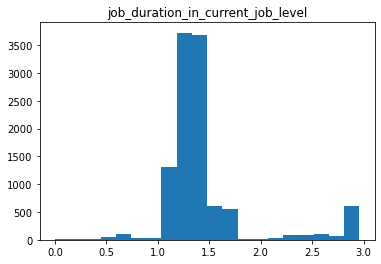

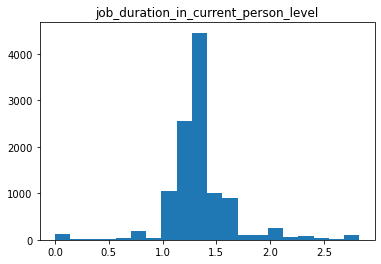

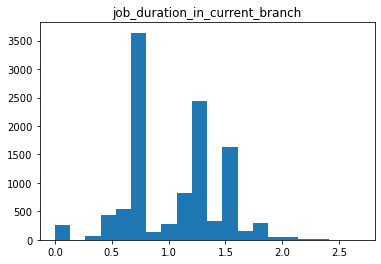

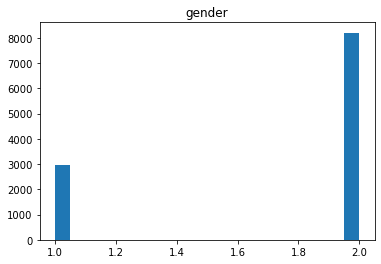

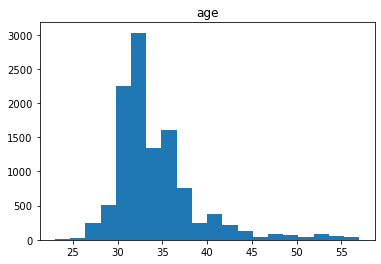

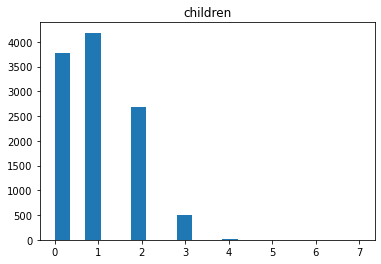

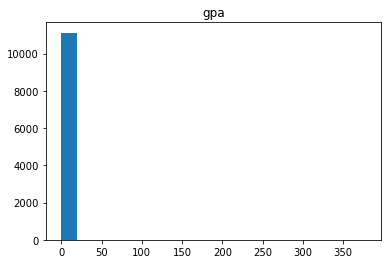

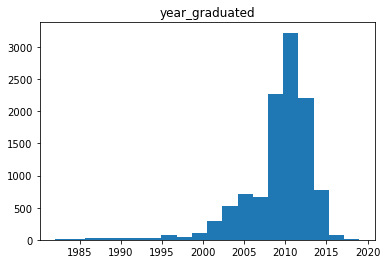

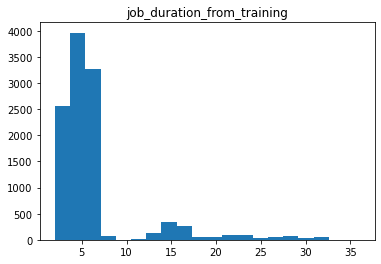

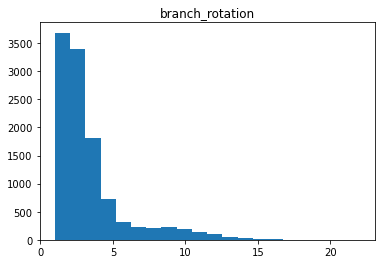

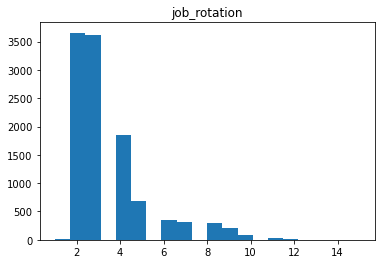

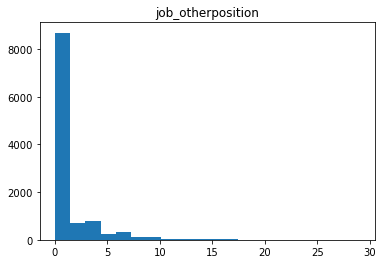

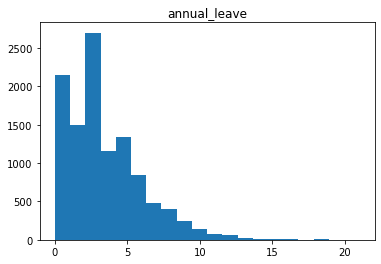

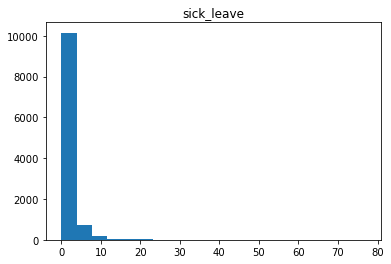

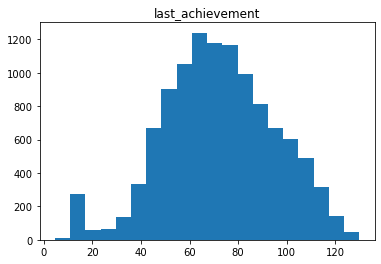

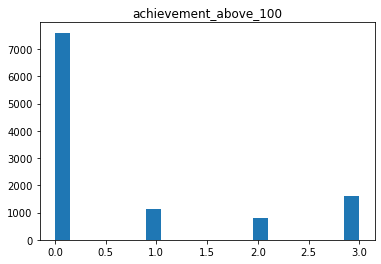

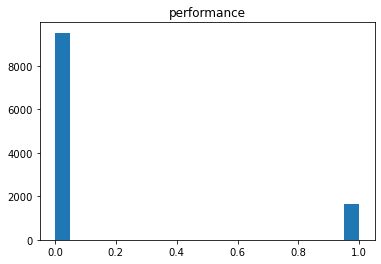

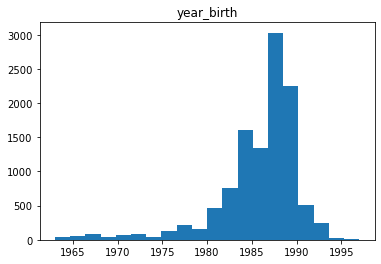

In [10]:
for i in numerical_data.columns:
    plt.hist(numerical_data[i], bins = 20)
    plt.title(i)
    plt.show()

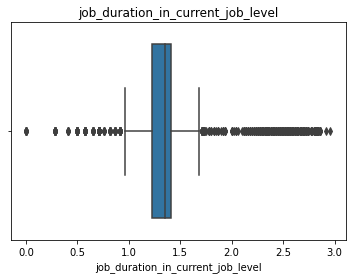

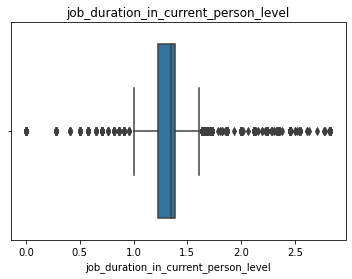

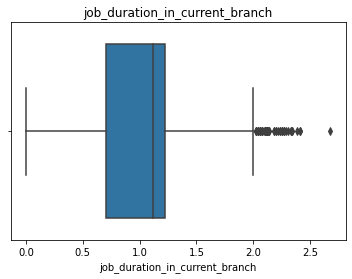

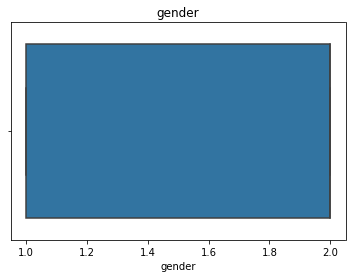

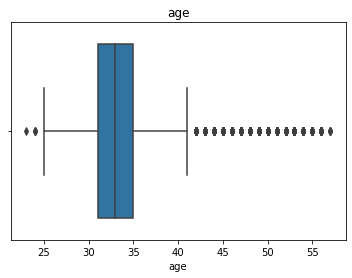

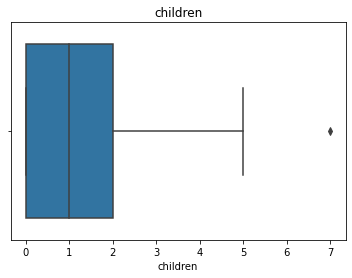

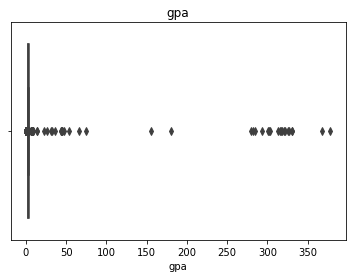

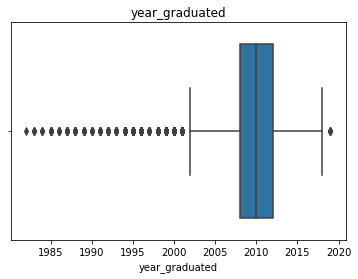

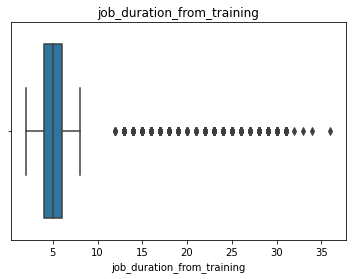

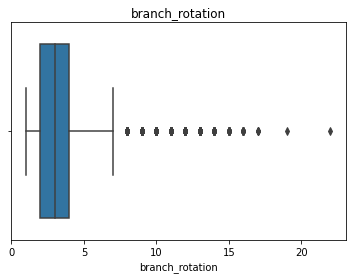

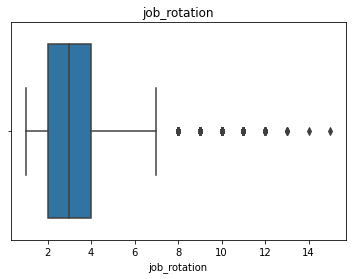

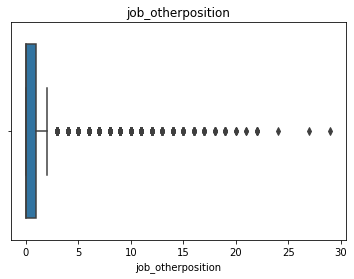

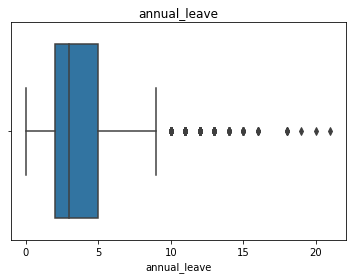

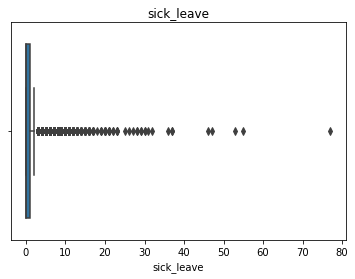

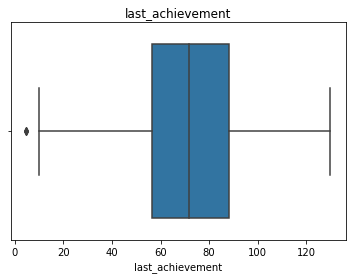

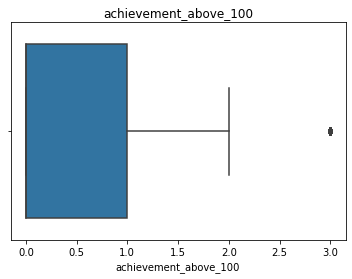

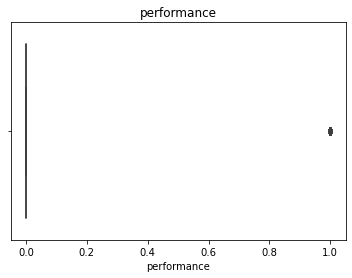

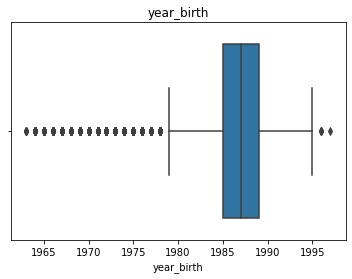

In [11]:
for i in numerical_data.columns:
    sns.boxplot(numerical_data[i])
    plt.title(i)
    plt.show()

In [12]:
pd.pivot_table(numerical_data, index = 'performance', values = ['job_duration_in_current_job_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'age', 'children', 'gpa',
       'year_graduated', 'job_duration_from_training', 'branch_rotation',
       'job_rotation', 'job_otherposition', 'annual_leave', 'sick_leave',
       'last_achievement', 'achievement_above_100'])

,achievement_above_100,age,annual_leave,branch_rotation,children,gpa,job_duration_from_training,job_duration_in_current_branch,job_duration_in_current_job_level,job_duration_in_current_person_level,job_otherposition,job_rotation,last_achievement,sick_leave,year_graduated
performance,,,,,,,,,,,,,,,
0,0.681240,34.126957,3.675775,3.704151,0.999264,3.219005,6.237940,1.031672,1.431977,1.347048,1.210615,3.499737,72.355672,1.086075,2009.188334
1,0.666463,34.375076,3.598656,3.813073,0.974343,2.927544,6.511301,1.052010,1.440450,1.361866,1.157605,3.539401,71.532932,1.173488,2009.089798


<AxesSubplot:>

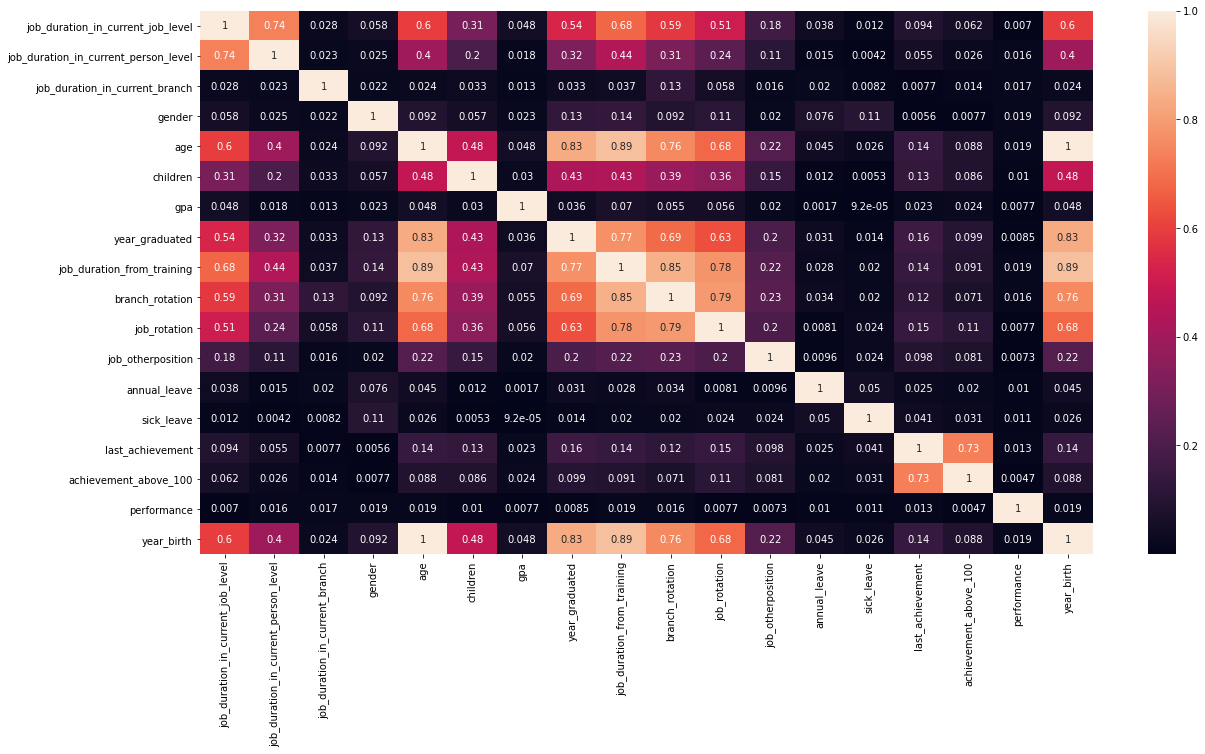

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(abs(numerical_data.corr()), annot= True, ax=ax)

Categorical

In [14]:
categorical_data.describe()

,job_level,person_level,employee_type,marital_status,education_level
count,11152,11152,11152,11152,11152
unique,3,8,3,2,6
top,JG04,PG03,RM_type_A,Y,level_4
freq,10412,9654,7286,9501,9222


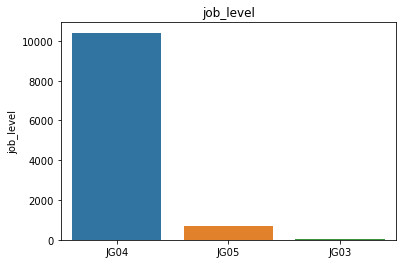

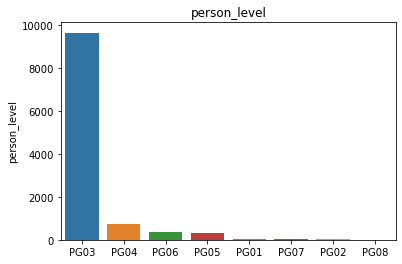

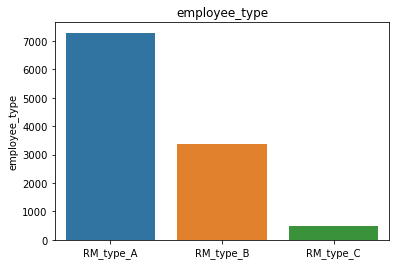

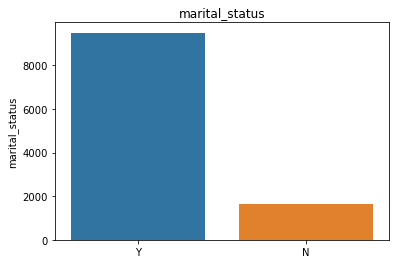

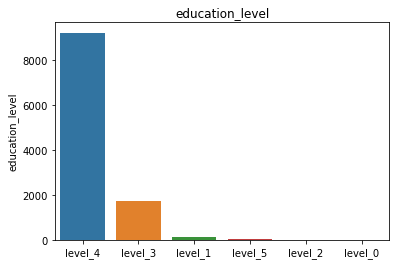

In [15]:
for i in categorical_data.columns:
    sns.barplot(categorical_data[i].value_counts().index, 
                categorical_data[i].value_counts(),
                ).set_title(i)
    plt.show()

In [16]:
# significancy checks on categorical data

from scipy.stats import chi2_contingency

categorical = data_train.select_dtypes(['object', 'bool'])


for i in categorical.columns:
    
    pivoted = data_train.pivot_table(index   = 'performance',
                                     columns = i,
                                     values  = 'age',
                                     aggfunc = np.count_nonzero,
                                     fill_value=0)
    
    print(pivoted) 
    col = []
    
    for j in range(len(pivoted.columns)):
        col.append(pivoted.columns[j])
    
    _, pval, _, _ = chi2_contingency(pivoted[col])
    
    print('\n pval for {} is {} \n\n'.format(i, pval))

job_level    JG03  JG04  JG05
performance                  
0              28  8889   598
1               8  1523   106

 pval for job_level is 0.4193777223955719 


person_level  PG01  PG02  PG03  PG04  PG05  PG06  PG07  PG08
performance                                                 
0               14    13  8232   656   276   307    17     0
1                5     3  1422   101    32    71     2     1

 pval for person_level is 0.008037099119114686 


employee_type  RM_type_A  RM_type_B  RM_type_C
performance                                   
0                   6256       2842        417
1                   1030        538         69

 pval for employee_type is 0.05135132385541699 


marital_status     N     Y
performance               
0               1391  8124
1                260  1377

 pval for marital_status is 0.19631153259137646 


education_level  level_0  level_1  level_2  level_3  level_4  level_5
performance                                                          


From the above:

1. 'gpa' has a WIDE distribution, let's inspect what happened and perhaps we can standarize
2. there are many skewed distributions
3. outliers are dominating almost every columns
4. in categorical data, we can see an ordinal or a categorical segment tends to dominate the distribution
5. performance looks not having a signifincance assosiation with other feature, which is strange.

problem 1: GPA

 1. looking for what gpa actually is
 2. looking for association between academic columns; 'education_level', 'gpa' and 'year_graduated'

In [17]:
data_train.groupby('education_level').agg({'gpa': ['mean', 'min', 'max']})

gpa              
                     mean   min     max
education_level                        
level_0          2.860000  2.86    2.86
level_1          6.766000  0.00  155.00
level_2          1.505000  0.00    3.01
level_3          2.694874  0.00  293.00
level_4          3.213578  0.00  378.00
level_5          3.139767  0.00    3.86

idea :

we don't think that every level is in a same baseline or description for gpa itself, it might be national exam score (?). but what we really sure is that education_level is an ordinal feature. so, we should inspect what level 0-5 represent. We have searched for this but what we found don't helping us since international standard define level_0 is in playgroup level, thus, the level 5 must be people that hold bachelor degree, let's see

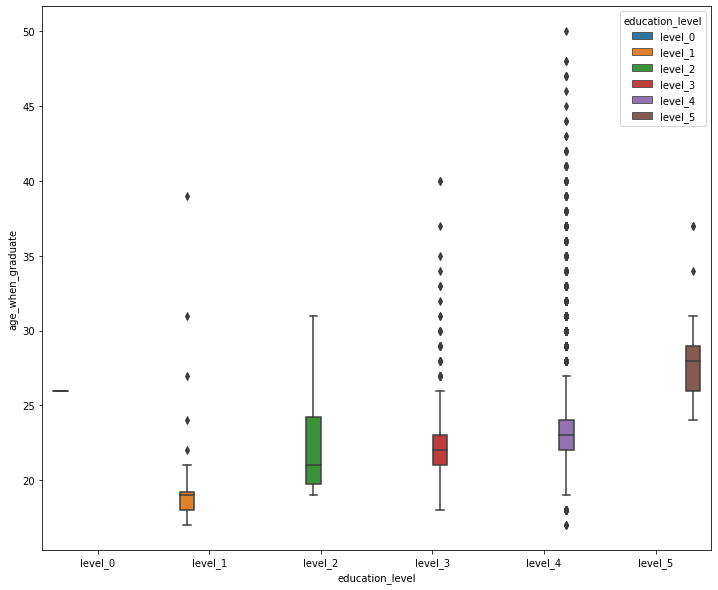

                age_when_graduate        
                           median min max
education_level                          
level_0                        26  26  26
level_1                        19  17  39
level_2                        21  19  31
level_3                        22  18  40
level_4                        23  17  50
level_5                        28  24  37


In [18]:
data_train['age_when_graduate'] = data_train.year_graduated - data_train.year_birth

f, ax = plt.subplots(figsize = (12, 10))
sns.boxplot(data = data_train, x = 'education_level', y = data_train.age_when_graduate, hue = 'education_level', ax = ax)
plt.show()

print(data_train.groupby('education_level').agg({'age_when_graduate': ['median', 'min', 'max']}))

data_train = data_train.drop(['age_when_graduate', 'year_birth'], axis = 1)

We don't think we can assume a concrete explaination from the inspection above. But we can slightly see that there is an increasing median from 1 to 5. If we look closer, the data showing us that level_1 is the only column that has gpa with non 4 scale. Can we assume level_1 is senior high school? let's see if this is useful.

We want to check gpa 'contribution' to the output:

In [19]:
print('corr coef gpa in respect to performance before manual standarization : {}'.format(abs(data_train.corr()).loc['gpa', 'performance']))

corr coef gpa in respect to performance before manual standarization : 0.007742770379857988


In [20]:
# in function below, we are assuming that level_1 is senior high school, thus level_0 is junior high school.
# in Indonesia, there could be 3 possible standard for one's final score from high school:
# 1. national exam
# 2. summary of all semesters that one had taken (this could be in 10 or 100 scale)
#
# for level_2 and above, this is quite easy. the distribution of 0 index is spreaded from 2 - 3 scale


def cleaning(data):
    
    for i in range(len(data)):
    
        edu = data.loc[i, 'education_level']
        ipk = data.loc[i, 'gpa']
        
        if ((edu == 'level_0') or (edu == 'level_1')):
        
            if (ipk == 0 or ipk > 100) :
                # ignoring outliers first
                continue
                
            elif ipk <= 10:
                data.loc[i, 'gpa'] = ipk / 10
                
            elif ipk <= 60:
                 data.loc[i, 'gpa'] = ipk / 60
            
            else:
                 data.loc[i, 'gpa'] = ipk / 100
                

        else:
            
            if (ipk == 0 or ipk > 400) :
                # ignoring outliers first
                continue
                
            elif ipk <= 4:
                data.loc[i, 'gpa'] = ipk / 4
            
            elif ipk <= 40:        
                data.loc[i, 'gpa'] = ipk / 40
            
            else:
                data.loc[i, 'gpa'] = ipk / 400

                
cleaning(data_train)
cleaning(data_test)

## fill the outlier from level_1

data_train.loc[108, 'gpa'] = np.median(data_train.gpa[data_train.education_level == 'level_1'])

In [21]:
print('corr coef gpa in respect to performance after manual standarization : {}'.format(abs(data_train.corr()).loc['gpa', 'performance']))

corr coef gpa in respect to performance after manual standarization : 0.017401497526925793


we can increase the corr coef by 0.01 (which is not even a thing but compare to all of the environment this really helps)

# feature engineering & selection

Problem 2 : OUTLIERS

honestly, we can't really interpret whic is really an outlier since the organizer didn't acknowledge us with the domain. BUT WE CAN ASSUMING.

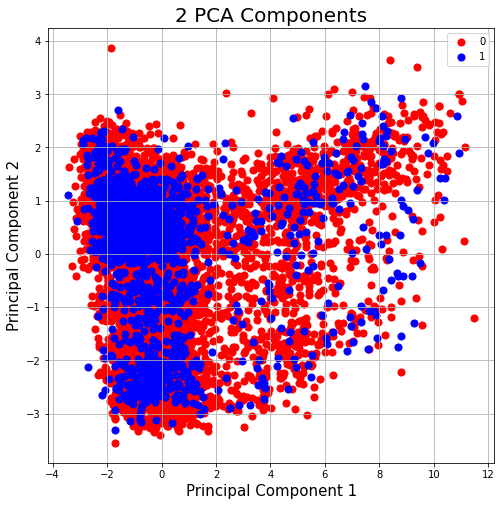

In [22]:
data_cut = data_train.select_dtypes(['int', 'float'])

X_cut = data_cut.drop('performance', axis = 1)
y_cut = data_cut.performance

sc=StandardScaler()  
X=sc.fit_transform(X_cut) 

#Define two components  
pca=PCA(n_components=2) 
principalComponents=pca.fit_transform(X) 
principalDf=pd.DataFrame(data=principalComponents,columns=['principal component 1','principal component 2']) 
principalDf.head()

finalDf=pd.concat([principalDf,data_cut[['performance']]],axis=1)

fig=plt.figure(figsize=(8,8))  
ax=fig.add_subplot(1,1,1)  
ax.set_xlabel('Principal Component 1',fontsize = 15)  
ax.set_ylabel('Principal Component 2',fontsize = 15)  
ax.set_title('2 PCA Components',fontsize=20)  
targets=[0, 1] 
colors=['r', 'b']  

for target,color in zip(targets,colors):    
    indicesToKeep = (finalDf['performance'] == target)  
    ax.scatter(finalDf.loc[indicesToKeep,'principal component 1'],
               finalDf.loc[indicesToKeep,'principal component 2'],
               c=color,
               s=50)

ax.legend(targets)  
ax.grid()

In [23]:
outliers = finalDf[(finalDf['principal component 1'] > 11) | (finalDf['principal component 2'] > 3)]
outliers
print(f"total outliers : {outliers.shape[0]}")

total outliers : 12


this PCA method just detecting outliers that has extreme values in over all environment.

In [24]:
data_train = data_train.drop(outliers.index, axis = 0).reset_index().drop('index', axis = 1)

In [25]:
# concatenate train & test

data_test['performance'] = np.NaN

data_train['train_test'] = 1
data_test['train_test']  = 0

all_data = pd.concat([data_train, data_test])

In [26]:
# normalize skewed distribution on numerical data

all_data['norm_job_duration_in_current_branch'] = np.log(all_data.job_duration_in_current_branch+1)
all_data['norm_age'] = np.log(all_data.age+1)
all_data['norm_year_graduated'] = np.log(all_data.year_graduated+1)
all_data['norm_job_duration_from_training'] = np.log(all_data.job_duration_from_training+1)
all_data['norm_branch_rotation'] = np.log(all_data.branch_rotation+1)
all_data['norm_job_rotation'] = np.log(all_data.job_rotation+1)
all_data['norm_job_otherposition'] = np.log(all_data.job_otherposition+1)
all_data['norm_annual_leave'] = np.log(all_data.annual_leave+1)
all_data['norm_sick_leave'] = np.log(all_data.sick_leave+1)

In [27]:
# recheck if the operation usefull

abs(all_data[all_data.train_test == 1].corr().performance).sort_values(ascending = False)

performance                             1.000000
job_duration_from_training              0.019773
gender                                  0.019613
age                                     0.019518
norm_job_duration_in_current_branch     0.019262
gpa                                     0.018174
job_duration_in_current_branch          0.017118
norm_age                                0.017080
job_duration_in_current_person_level    0.016929
branch_rotation                         0.016830
norm_job_otherposition                  0.015400
norm_sick_leave                         0.015249
last_achievement                        0.013068
norm_branch_rotation                    0.012230
norm_job_duration_from_training         0.011259
norm_annual_leave                       0.011153
children                                0.010056
annual_leave                            0.010046
sick_leave                              0.010009
norm_year_graduated                     0.009830
year_graduated      

In [28]:
# drop columns that have very low correlation

all_data = all_data.drop(['norm_age', 'job_duration_in_current_branch', 'sick_leave', 'norm_branch_rotation',
                          'norm_job_duration_from_training', 'annual_leave', 'norm_year_graduated',
                          'year_graduated', 'job_rotation','job_otherposition',
                          'job_duration_in_current_job_level', 'norm_job_rotation',
                          'achievement_above_100'], axis = 1)

<AxesSubplot:>

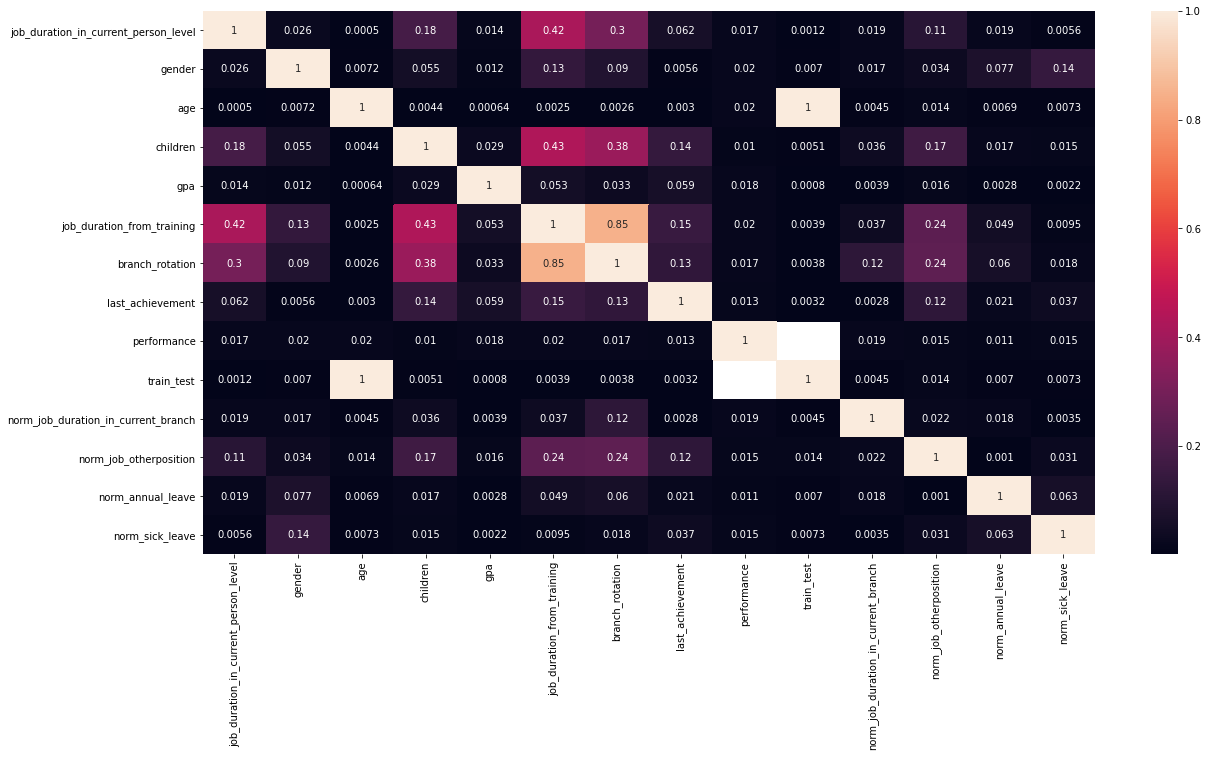

In [29]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(abs(all_data.corr()), annot= True, ax=ax)

we can cut down possible multicorr between features

In [30]:
# create dummies for train data to check feature selection

feat_sel = all_data[all_data.train_test == 1]

X_feat_sel = pd.get_dummies(data = feat_sel, columns = feat_sel.select_dtypes(['object', 'bool']).columns)
X_feat_sel = X_feat_sel.drop(columns = ['performance', 'train_test'])
y_feat_sel = feat_sel.performance

In [31]:
# feature selection insights

models = [LogisticRegression(C=1, penalty='l2'), Lasso(alpha = 1.0)]

for model in models:
    rfe = RFE(model, 10)
    fit = rfe.fit(X_feat_sel, y_feat_sel)
    
    print("Num Features: %s \n" % (fit.n_features_))
    print("Selected Features: %s \n" % (fit.support_))
    print("Feature Ranking: %s \n \n \n \n" % (fit.ranking_))

Num Features: 10 

Selected Features: [False False False False False False False False  True False False False
 False  True False  True False False False  True False  True  True  True
 False  True False False False  True  True False False False] 

Feature Ranking: [12  3 24 15  2 21 10 25  1 11 13 14  4  1  8  1 23  7  5  1 17  1  1  1
 16  1  9  6 22  1  1 20 19 18] 
 
 
 

Num Features: 10 

Selected Features: [False False False False False False False False False False False False
 False False False False False False False False False False False False
  True  True  True  True  True  True  True  True  True  True] 

Feature Ranking: [25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2
  1  1  1  1  1  1  1  1  1  1] 
 
 
 



# PRE PROCESSING

In [32]:
# create dummies from OneHotEncoding

all_data = pd.get_dummies(data = all_data, columns = all_data.select_dtypes(['object', 'bool']).columns)

In [33]:
# seperate the data

all_data_cleaned = all_data[all_data.train_test == 1].drop(['train_test'], axis = 1)


X_submission = X = all_data[all_data.train_test == 0].drop(['performance', 'train_test'], axis = 1)

In [34]:
# split train - test
data_train, data_test = train_test_split(all_data_cleaned, test_size = 0.2,
                                         random_state = 10)


# Define class target for testing
X_test = data_test.drop(['performance'], axis = 1)
y_test = data_test['performance']

In [35]:
# SMOTE
X = data_train.drop(['performance'], axis = 1)
y = data_train['performance']

oversample = ADASYN()
X_train, y_train = oversample.fit_resample(X, y)


print(f'''shape of data before SMOTE: {X.shape}
#shape of data after SMOTE: {X_train.shape}''')


shape of data before SMOTE: (8912, 35)
#shape of data after SMOTE: (15135, 35)


# MODEL PREPARATION

since we know that there are outliers in each columns, it'd be a better step if we try to use models that are not sensitive to outliers; ensamble family algorithm.

In [36]:
# input classifiers here!

classifiers = {}

classifiers.update({"AdaBoost": AdaBoostClassifier()})
classifiers.update({"Gradient Boosting": GradientBoostingClassifier()})
classifiers.update({"Bagging": BaggingClassifier()})
classifiers.update({"Extra Trees Ensemble": ExtraTreesClassifier()})
classifiers.update({"Random Forest": RandomForestClassifier()})
classifiers.update({"XGB": xgb.XGBRFClassifier(random_state=12345, nthread=-1)})


# input parameters here!

parameters = {}

parameters.update({"AdaBoost": { 
                                "classifier__base_estimator": [DecisionTreeClassifier(max_depth = ii) for ii in range(1,6)],
                                "classifier__n_estimators": [200],
                                "classifier__learning_rate": [0.001, 0.01, 0.05, 0.1, 0.25, 0.50, 0.75, 1.0]
                               }})

parameters.update({"Gradient Boosting": { 
                                        "classifier__learning_rate":[0.15,0.1,0.05,0.01,0.005,0.001], 
                                        "classifier__n_estimators": [200],
                                        "classifier__max_depth": [2,3,4,5,6],
                                        "classifier__min_samples_split": [0.001, 0.01, 0.05, 0.10],
                                        "classifier__min_samples_leaf": [0.001, 0.01, 0.05, 0.10],
                                        "classifier__max_features": ["auto", "sqrt", "log2"],
                                        "classifier__subsample": [1]
                                         }})

parameters.update({"Bagging": { 
                                "classifier__base_estimator": [DecisionTreeClassifier(max_depth = ii) for ii in range(1,6)],
                                "classifier__n_estimators": [200],
                                "classifier__max_features": [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                "classifier__n_jobs": [-1]
                                }})

parameters.update({"Extra Trees Ensemble": { 
                                            "classifier__n_estimators": [200],
                                            "classifier__class_weight": [None, "balanced"],
                                            "classifier__max_features": ["auto", "sqrt", "log2"],
                                            "classifier__max_depth" : [3, 4, 5, 6, 7, 8],
                                            "classifier__min_samples_split": [0.001, 0.01, 0.05, 0.10],
                                            "classifier__min_samples_leaf": [0.001, 0.01, 0.05, 0.10],
                                            "classifier__criterion" :["gini", "entropy"]     ,
                                            "classifier__n_jobs": [-1]
                                             }})

parameters.update({"Random Forest": { 
                                    "classifier__n_estimators": [200],
                                    "classifier__class_weight": [None, "balanced"],
                                    "classifier__max_features": ["auto", "sqrt", "log2"],
                                    "classifier__max_depth" : [3, 4, 5, 6, 7, 8],
                                    "classifier__min_samples_split": [0.001, 0.01, 0.05, 0.10],
                                    "classifier__min_samples_leaf": [0.001, 0.01, 0.05, 0.10],
                                    "classifier__criterion" :["gini", "entropy"]     ,
                                    "classifier__n_jobs": [-1]
                                     }})

parameters.update({"XGB": { 
                           'classifier__min_child_weight': [1, 5, 10],
                           'classifier__gamma': [0.5, 1, 1.5, 2, 5],
                           'classifier__subsample': [0.6, 0.8, 1.0],
                           'classifier__colsample_bytree': [0.6, 0.8, 1.0],
                           'classifier__max_depth': [3, 4, 5, 10, 12, 15],
                           'classifier__learning_rate' : [0.01, 0.02, 0.1, 0.25, 0.5],
                           }})
                                     

In [ ]:
results = {}


# Tune and evaluate classifiers
for classifier_label, classifier in classifiers.items():
    # Print message to user
    print("Now tuning {} :".format(classifier_label))
    
    # Scale features via Z-score normalization
    scaler = StandardScaler()
    
    # Define steps in pipeline
    steps = [("scaler", scaler), ("classifier", classifier)]
    
    # Initialize Pipeline object
    pipeline = Pipeline(steps = steps)
      
    # Define parameter grid
    param_grid = parameters[classifier_label]
    
    # Initialize GridSearch object
    gscv = GridSearchCV(pipeline, param_grid, cv = 5,  n_jobs= -1, verbose = 1, scoring = "accuracy", return_train_score=True)
                      
    # Fit gscv
    gscv.fit(X_train, y_train)  
    
    # Get best parameters and score
    best_params = gscv.best_params_
    best_score = gscv.best_score_
    
    # Update classifier parameters and define new pipeline with tuned classifier
    tuned_params = {item[12:]: best_params[item] for item in best_params}
    classifier.set_params(**tuned_params)
            
    # Make predictions
    y_pred = gscv.predict(X_test)
        
    # Get AUC
    auc = metrics.roc_auc_score(y_test, y_pred)
    
    # Get f1 score
    y_pred = gscv.predict(X_test)
    f1 = metrics.f1_score(y_test, y_pred)
    
    # Get recall score
    recall = metrics.recall_score(y_test, y_pred)

    # Get precision score
    precision = metrics.precision_score(y_test, y_pred)
    
    # Get accuracy score
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    # False Positive rate
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    fp_rate = (fp)/(fp + tn)
    
    plot_confusion_matrix(gscv, X_test, y_test) 
    
    plt.figure(figsize=(20,20))
    plt.show()
    
    test_scores = gscv.cv_results_['mean_test_score']
    train_scores = gscv.cv_results_['mean_train_score'] 

    plt.plot(test_scores, label='test')
    plt.plot(train_scores, label='train')
    plt.legend(loc='best')
    plt.show()

    # Save results
    result = {"Classifier": classifier_label,
              "Best Parameters": best_params,
              "Training Recall Score": best_score,
              "Test Recall Score": recall,
              "Test Precision Score": precision,
              "Test Accuracy Score" : accuracy,
              "Test F1 Score": f1,
              "False Positive Rate": fp_rate,
              "Test AUC": auc}
    
    results.update({classifier_label: result})  
    
    print(f'''Best Parameters       : {best_params} \n,
          Training Recall Score : {best_score} \n,
          Test Recall Score     : {recall} \n,
          Test Precision Score  : {precision} \n,
          Test Accuracy Score   : {accuracy} \n,
          Test F1 Score         : {f1} \n,
          False Positive Rate   : {fp_rate} \n,
          Test AUC              : {auc}''')
    
      

In [ ]:
y_submission = gscv.predict_proba(X_submission)
submission = pd.DataFrame(y_submission)
submission.rename(columns = {1 : 'Best Performance'}, inplace = True)
submission = submission['Best Performance']
submission = submission.reset_index()

submission.to_csv(f'''submission_XGB.csv''', index = False)